# Análisis Descriptivo: Análisis de Tendencias de las ventas del negocio

El análisis de tendencia es una técnica estadística que se utiliza para identificar patrones o tendencias en un conjunto de datos a lo largo del tiempo. El análisis de tendencia es utilizado para predecir la dirección futura del comportamiento de los datos basándose en su comportamiento pasado.

### Carga de las librerías de pyhton necesarias

In [1]:
# Debe instalar las librerias necesarias antes del import
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]

pd.options.display.float_format = '{:.2f}'.format

Las librerías de Python son conjuntos de código predefinidos que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

### Conexión a SQL Server y extracción de los datos

- Explique línea a línea el código mostrado abajo. Debe explicar tambien la query. Puede probar aparte la query desde Azure Data Studio o directamente desde SQL Server Managment Studio.

In [3]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=T05W06;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
# En Server=BALRODJJ debes colocar el nombre de tu base de datos.
# Lo demás se deja igual
input_query = '''select
	 year(t1.OrderDate) as 'año', 
	 month(t1.OrderDate) as 'mes',
	 sum(t1.TotalDue) as 'ventas'
from Sales.SalesOrderHeader as t1
	group by year(t1.OrderDate), month(t1.OrderDate) 
	order by year(t1.OrderDate), month(t1.OrderDate)'''

ventas = pd.read_sql(input_query, conn_str)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_8892\2056220626.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ventas = pd.read_sql(input_query, conn_str)


In [4]:
ventas

,año,mes,ventas
0,2011,5,567020.95
1,2011,6,507096.47
2,2011,7,2292182.88
3,2011,8,2800576.17
4,2011,9,554791.61
5,2011,10,5156269.53
6,2011,11,815313.02
7,2011,12,1462448.90
8,2012,1,4458337.44
9,2012,2,1649051.90


### El código **no** da error, sin embargo imprime un `warning` donde se sugiere el uso de `SQLAlchemy` en vez de `pyodbc`. Investigue como se hace la conexión a SQL Server con SQLAlchemy utilizando la misma base de datos , pruebe con la misma query anterior, guardar los resultados en un nuevo dataframe usando read_sql e imprima la tabla. Explicar linea por linea el código utilizado.

Para evitar el warning y utilizar SQLAlchemy en lugar de pyodbc, primero es necesario instalar SQLAlchemy y el controlador adecuado para SQL Server, como pyodbc. Supondremos que ya están instalados. Si no, puede instalarse con el siguiente comando

pip install sqlalchemy                             #  ejecutar en terminal Bash
pip install pyodbc


Código para Conectarse a SQL Server con SQLAlchemy
Importar las Bibliotecas Necesarias:

### Exploración del dataset extraído (ventas)

- Muestre la información general del dataframe (info):

In [20]:
# Mostrar la información general del DataFrame ventas
ventas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   año     38 non-null     int64  
 1   mes     38 non-null     int64  
 2   ventas  38 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.0 KB


- Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [21]:
# Obtener estadísticas descriptivas del DataFrame ventas
estadisticas_ventas = ventas.describe()

# Imprimir el resumen de las estadísticas descriptivas
print(estadisticas_ventas)


          año   mes     ventas
count   38.00 38.00      38.00
mean  2012.42  6.45 3242547.00
std      1.00  3.41 1787700.91
min   2011.00  1.00   54151.48
25%   2012.00  4.00 2013702.89
50%   2012.00  6.00 3256597.82
75%   2013.00  9.00 4535017.18
max   2014.00 12.00 8097036.31


- Mostrar las dimensiones del dataset

In [22]:
# Mostrar las dimensiones del DataFrame ventas
dimensiones = ventas.shape

# Imprimir las dimensiones
print(f"Dimensiones del DataFrame ventas: {dimensiones}")


Dimensiones del DataFrame ventas: (38, 3)


- Imprimir en un objeto tipo Index todas las columnas del dataframe

In [23]:
# Obtener todas las columnas del DataFrame ventas en un objeto tipo Index
columnas = ventas.columns

# Imprimir el objeto tipo Index con las columnas
print(columnas)


Index(['año', 'mes', 'ventas'], dtype='object')


- Muestre el contenido de las primeras 15 líneas del dataframe

In [24]:
# Mostrar las primeras 15 líneas del DataFrame ventas
primeras_15_lineas = ventas.head(15)

# Imprimir las primeras 15 líneas
print(primeras_15_lineas)


     año  mes     ventas
0   2011    5  567020.95
1   2011    6  507096.47
2   2011    7 2292182.88
3   2011    8 2800576.17
4   2011    9  554791.61
5   2011   10 5156269.53
6   2011   11  815313.02
7   2011   12 1462448.90
8   2012    1 4458337.44
9   2012    2 1649051.90
10  2012    3 3336347.47
11  2012    4 1871923.50
12  2012    5 3452924.45
13  2012    6 4610647.22
14  2012    7 3840231.46


- Muestre las últimas cinco líneas del dataframe

In [25]:
# Mostrar las últimas 5 líneas del DataFrame ventas
ultimas_5_lineas = ventas.tail()

# Imprimir las últimas 5 líneas
print(ultimas_5_lineas)


     año  mes     ventas
33  2014    2 1478213.29
34  2014    3 8097036.31
35  2014    4 1985886.15
36  2014    5 6006183.21
37  2014    6   54151.48


- Calcule Correlaciones y Covarianzas. Explicar resultados

In [26]:
# Calcular las correlaciones del DataFrame ventas
correlaciones = ventas.corr()

# Calcular las covarianzas del DataFrame ventas
covarianzas = ventas.cov()

# Imprimir los resultados
print("Correlaciones:")
print(correlaciones)
print("\nCovarianzas:")
print(covarianzas)


Correlaciones:
         año   mes  ventas
año     1.00 -0.40    0.42
mes    -0.40  1.00   -0.04
ventas  0.42 -0.04    1.00

Covarianzas:
             año        mes           ventas
año         1.01      -1.38        750498.19
mes        -1.38      11.66       -241446.93
ventas 750498.19 -241446.93 3195874540096.30


## Visualización gráfica de los datos

### Gráfico de barras de las ventas por mes

Se realiza una exploración visual de curva que dibuja las ventas agrupadas por mes.

- Explique línea por línea el siguiente código:

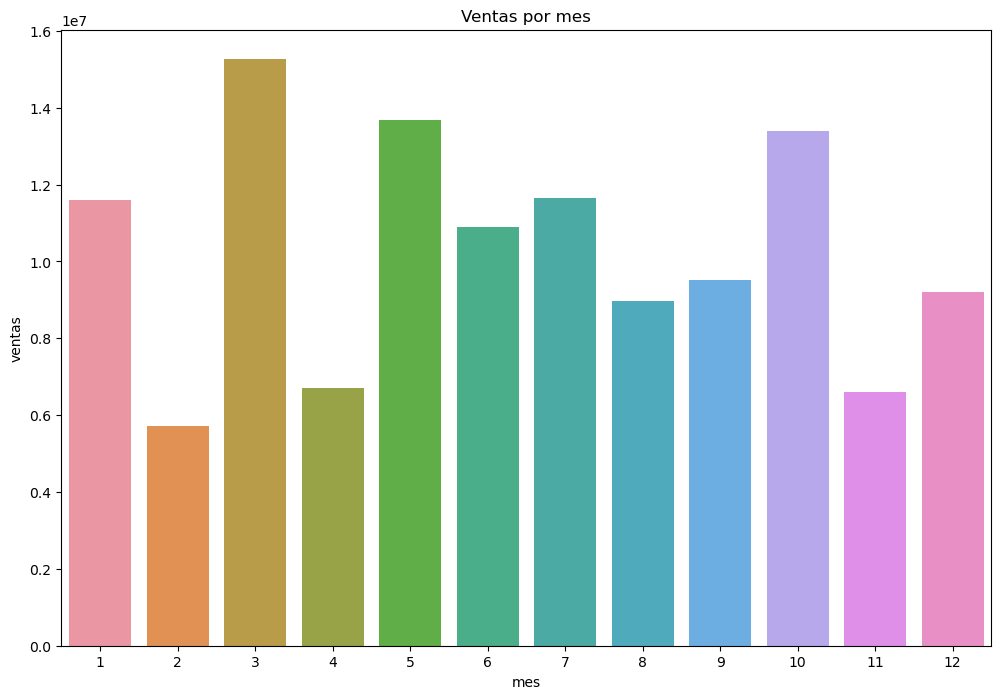

In [29]:
# Agrupar las ventas por mes y sumar las ventas en cada mes
ventas_por_mes = ventas.groupby('mes')['ventas'].sum().reset_index()

# Crear un gráfico de barras usando seaborn
sns.barplot(x='mes', y='ventas', data=ventas_por_mes)

# Añadir un título al gráfico
plt.title('Ventas por mes')

# Mostrar el gráfico
plt.show()


- Interpretar o explicar lo que el gráfico de arriba 'esta diciendo'.

#### Interpretación del Gráfico
El gráfico de barras muestra las ventas totales agrupadas por mes. Cada barra representa el total de ventas para un mes específico.

Mes 3: Parece tener el pico más alto de ventas, indicando que marzo es el mes con mayores ventas.
Meses 5 y 10: También muestran ventas relativamente altas comparadas con otros meses.
Meses 2 , 4 y 11: Tienen las ventas más bajas.
Otros meses: Tienen ventas intermedias, con cierta variabilidad.


Marzo es el mes con las ventas más altas, lo que podría deberse a campañas de marketing, promociones, o estacionalidad.


### Gráfico de línea de las ventas por año

Se observa la curva que dibuja la evolución de las ventas agrupadas por año.

- Explique línea por línea el siguiente código:

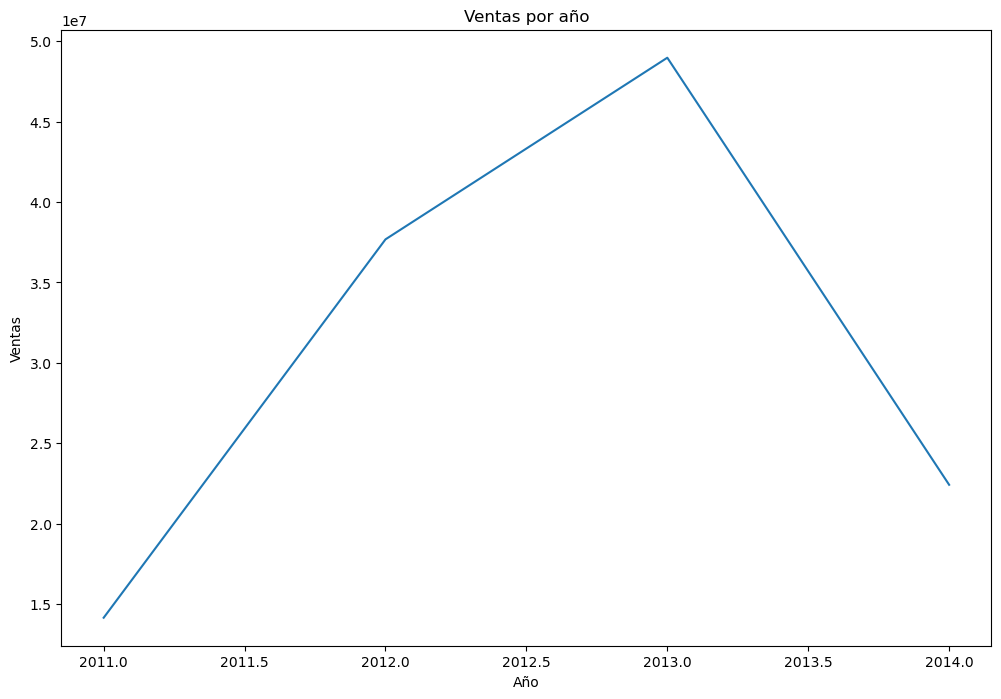

In [30]:
# Agrupar las ventas por año y sumar las ventas en cada año
ventas_por_año = ventas.groupby('año')['ventas'].sum().reset_index()

# Crear un gráfico de línea usando matplotlib
plt.plot(ventas_por_año['año'], ventas_por_año['ventas'])

# Añadir un título al gráfico
plt.title('Ventas por año')

# Añadir etiquetas a los ejes x e y
plt.xlabel('Año')
plt.ylabel('Ventas')

# Mostrar el gráfico
plt.show()


- Interpretar o explicar lo que el gráfico de arriba 'esta diciendo'.

#### Interpretación del Gráfico

El gráfico de línea muestra la evolución de las ventas totales agrupadas por año. La curva representa cómo han cambiado las ventas a lo largo de los años.

Tendencia General:

Las ventas muestran una tendencia creciente desde el inicio hasta un pico, seguido de una caída.
Esto puede indicar un período de crecimiento en ventas hasta alcanzar el máximo en un año específico, seguido de una disminución.

Pico en el Año 2013:

El año 2013 tiene el valor más alto de ventas, lo que puede sugerir que fue un año excepcional en términos de rendimiento de ventas.
Es importante investigar qué factores contribuyeron a este pico (e.g., lanzamientos de productos, campañas de marketing exitosas, cambios en la economía).

Caída en el Año 2014:

Después del pico en 2013, hay una caída significativa en las ventas en 2014.
Este descenso puede ser motivo de preocupación y requiere un análisis detallado para entender las causas (e.g., cambios en el mercado, pérdida de cuota de mercado, factores económicos adversos).






### Prueba formal: Prueba de tendencia

Existen diferentes métodos para realizar el análisis de tendencia, pero uno de los más utilizados es la regresión lineal. La regresión lineal es una técnica estadística que se utiliza para encontrar la relación entre una variable dependiente (por ejemplo, el precio de una acción) y una o más variables independientes (por ejemplo, el tiempo).

Se realiza una prueba de tendencia utilizando la función linregress de la biblioteca scipy.stats. Esta función calcula la pendiente de una línea de regresión lineal y el valor p asociado, que indica la probabilidad de que la pendiente sea cero. Si el valor p es menor que 0,05, se concluye que hay evidencia de una tendencia significativa en los datos.

- Explicar el siguiente código:

In [34]:
from scipy.stats import linregress

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(ventas['año'], ventas['ventas'])

# Imprimir la pendiente de la recta de regresión
print('Pendiente: ', slope)

# Imprimir el valor p de la regresión
print('Valor p: ', p_value)

# Evaluar la significancia del valor p
if p_value < 0.05:
    print('La tendencia es significativa')
else:
    print('No hay evidencia de tendencia significativa')


Pendiente:  745198.0612926556
Valor p:  0.008957361661882999
La tendencia es significativa


## Conclusiones

Luego del análisis realizado se puede concluir que la *pendiente* de **745198.0612926556** indica que hay un aumento en las ventas por año en la base de datos AdventureWorks2019. Es decir, en promedio, las ventas están aumentando en **745198.06 unidades por año**.

El *valor p* de **0.008957361661882999** indica que la probabilidad de obtener una pendiente tan grande como la observada en los datos si la pendiente real es cero es de aproximadamente **0.9%**. Como este valor p es menor que el nivel de significancia comúnmente utilizado de *0,05*, se concluye que hay evidencia suficiente para afirmar que hay una tendencia significativa en los datos.

***Por lo tanto, se puede afirmar que las ventas de AdventureWorks2019 están aumentando significativamente con el tiempo.***

## Recomendaciones

Dado que las ventas están aumentando significativamente con el tiempo, una recomendación para la empresa podría ser continuar invirtiendo en áreas clave para mantener esta tendencia positiva. Por ejemplo, la empresa podría considerar:

* *Mejorar el marketing*: la empresa podría invertir en esfuerzos de marketing para aumentar la conciencia de marca y atraer a más clientes potenciales.

* *Expandir la oferta de productos*: si la empresa ve un aumento en las ventas en ciertas categorías de productos, podría considerar expandir su oferta en esas áreas para aprovechar esa tendencia.

* *Optimizar la cadena de suministro*: si la empresa ve una tendencia a largo plazo de aumento en las ventas, podría considerar optimizar su cadena de suministro para garantizar que pueda satisfacer la demanda futura y mantener su nivel de servicio al cliente.

* *Fomentar la fidelidad del cliente*: la empresa podría implementar programas de lealtad para fomentar la fidelidad del cliente y aumentar la retención.

* *Explorar nuevos canales de venta*: la empresa podría considerar expandir su presencia en línea o abrir nuevas tiendas para aprovechar la tendencia positiva en las ventas.

En general, la recomendación sería que la empresa mantenga un enfoque en la comprensión y la satisfacción de las necesidades de sus clientes, así como en la eficiencia operativa, a medida que busca capitalizar en la tendencia positiva en las ventas.

- Efectuar nuevas consultas sql (desde **Azure Data Studio** o desde **SQL Server Managment Studio**).  Suponga que aún no le han informado del objetivo negocio, por lo tanto debe en primer lugar entender los datos que tiene. Explorar los datos que tienes en la misma base de datos **AdventureWorks2019** y ver que información relevante y de utilidad se puede extraer de allí. Guardar la(s) query(s) final(es) y luego pasarlo a `SQLALchemy` para obtener un dataframe final sobre el cual vas a realizar análisis descriptivos (con pandas) como los efectuados en el caso expuesto arriba. Los plots son opcionales. Elaborar conclusiones y recomendaciones sobre el potencial de tus resultados.   

#### Paso 1: Exploración de datos en AdventureWorks2019

Primero, vamos a explorar los datos en la base de datos AdventureWorks2019 usando SQL Server Management Studio (SSMS). El objetivo es identificar tablas y columnas que podrían ser útiles para análisis descriptivos.

Algunas de las tablas clave en AdventureWorks2019 incluyen:

Sales.SalesOrderHeader
Sales.SalesOrderDetail
Production.Product
Person.Person
Sales.Customer
Sales.Store

#### Paso 2 Conectar usando SQLAlchemy

In [2]:
import pyodbc

# Definir los parámetros de conexión
server = 'T05W06'
database = 'AdventureWorks2019'

# Crear la conexión usando autenticación de Windows
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
conn = pyodbc.connect(connection_string)

# Crear un cursor
cursor = conn.cursor()

# Ejecutar una consulta de prueba
cursor.execute("SELECT TOP 10 * FROM Sales.SalesOrderHeader")
rows = cursor.fetchall()

# Imprimir los resultados
for row in rows:
    print(row)

# Cerrar la conexión
conn.close()



(43659, 8, datetime.datetime(2011, 5, 31, 0, 0), datetime.datetime(2011, 6, 12, 0, 0), datetime.datetime(2011, 6, 7, 0, 0), 5, False, 'SO43659', 'PO522145787', '10-4020-000676', 29825, 279, 5, 985, 985, 5, 16281, '105041Vi84182', None, Decimal('20565.6206'), Decimal('1971.5149'), Decimal('616.0984'), Decimal('23153.2339'), None, '79B65321-39CA-4115-9CBA-8FE0903E12E6', datetime.datetime(2011, 6, 7, 0, 0))
(43660, 8, datetime.datetime(2011, 5, 31, 0, 0), datetime.datetime(2011, 6, 12, 0, 0), datetime.datetime(2011, 6, 7, 0, 0), 5, False, 'SO43660', 'PO18850127500', '10-4020-000117', 29672, 279, 5, 921, 921, 5, 5618, '115213Vi29411', None, Decimal('1294.2529'), Decimal('124.2483'), Decimal('38.8276'), Decimal('1457.3288'), None, '738DC42D-D03B-48A1-9822-F95A67EA7389', datetime.datetime(2011, 6, 7, 0, 0))
(43661, 8, datetime.datetime(2011, 5, 31, 0, 0), datetime.datetime(2011, 6, 12, 0, 0), datetime.datetime(2011, 6, 7, 0, 0), 5, False, 'SO43661', 'PO18473189620', '10-4020-000442', 29734, 

In [3]:
from sqlalchemy import create_engine
import pandas as pd

# Definir los parámetros de conexión
server = 'T05W06'
database = 'AdventureWorks2019'

# Crear la URL de conexión usando autenticación de Windows
database_url = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"

# Crear la conexión
engine = create_engine(database_url)

# Definir la consulta SQL
query = """
SELECT 
    SOH.SalesOrderID,
    SOH.OrderDate,
    SOH.TotalDue,
    P.Name AS ProductName,
    SOD.OrderQty,
    SOD.LineTotal
FROM 
    Sales.SalesOrderHeader SOH
JOIN 
    Sales.SalesOrderDetail SOD ON SOH.SalesOrderID = SOD.SalesOrderID
JOIN 
    Production.Product P ON SOD.ProductID = P.ProductID
WHERE 
    YEAR(SOH.OrderDate) = 2014
ORDER BY 
    SOH.OrderDate;
"""

# Ejecutar la consulta y obtener un dataframe
df = pd.read_sql(query, engine)

# Mostrar las primeras filas del dataframe
print(df.head())


   SalesOrderID  OrderDate  TotalDue                 ProductName  OrderQty  \
0         63374 2014-01-01   40.0784                Touring Tire         1   
1         63368 2014-01-01  937.5594  Women's Mountain Shorts, S         1   
2         63383 2014-01-01   75.0627       Bike Wash - Dissolver         1   
3         63368 2014-01-01  937.5594             Racing Socks, L         1   
4         63419 2014-01-01  624.8444          Road-750 Black, 48         1   

   LineTotal  
0      28.99  
1      69.99  
2       7.95  
3       8.99  
4     539.99  


In [4]:
from sqlalchemy import create_engine
import pandas as pd

# Definir los parámetros de conexión
server = 'T05W06'
database = 'AdventureWorks2019'

# Crear la URL de conexión usando autenticación de Windows
database_url = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"

# Crear la conexión
engine = create_engine(database_url)

# Definir la consulta SQL para ventas por cliente
query_ventas_por_cliente = """
SELECT 
    C.CustomerID,
    C.PersonID,
    C.StoreID,
    C.TerritoryID,
    SOH.SalesOrderID,
    SOH.OrderDate,
    SOH.TotalDue
FROM 
    Sales.Customer C
JOIN 
    Sales.SalesOrderHeader SOH ON C.CustomerID = SOH.CustomerID
ORDER BY 
    C.CustomerID, SOH.OrderDate;
"""

# Ejecutar la consulta y obtener un dataframe
df_ventas_por_cliente = pd.read_sql(query_ventas_por_cliente, engine)

# Mostrar las primeras filas del dataframe
print(df_ventas_por_cliente.head())


   CustomerID  PersonID  StoreID  TerritoryID  SalesOrderID  OrderDate  \
0       11000     13531      NaN            9         43793 2011-06-21   
1       11000     13531      NaN            9         51522 2013-06-20   
2       11000     13531      NaN            9         57418 2013-10-03   
3       11001      5454      NaN            9         43767 2011-06-17   
4       11001      5454      NaN            9         51493 2013-06-18   

    TotalDue  
0  3756.9890  
1  2587.8769  
2  2770.2682  
3  3729.3640  
4  2674.0227  


In [5]:
# Resumen descriptivo
summary = df_ventas_por_cliente.describe()

# Ventas totales por cliente
ventas_totales_por_cliente = df_ventas_por_cliente.groupby('CustomerID')['TotalDue'].sum().reset_index()

# Mostrar las primeras filas del resumen descriptivo
print(summary)
print(ventas_totales_por_cliente.head())


         CustomerID      PersonID      StoreID   TerritoryID  SalesOrderID  \
count  31465.000000  31465.000000  3806.000000  31465.000000  31465.000000   
mean   20170.175687  10286.225330  1023.135050      6.090768  59391.000000   
min    11000.000000    291.000000   292.000000      1.000000  43659.000000   
25%    14432.000000   4979.000000   642.000000      4.000000  51525.000000   
50%    19452.000000  10338.000000   978.000000      6.000000  59391.000000   
75%    25994.000000  15573.000000  1332.000000      9.000000  67257.000000   
max    30118.000000  20777.000000  1994.000000     10.000000  75123.000000   
std     6261.728960   6094.037803   471.247571      2.958119   9083.307446   

                           OrderDate       TotalDue  
count                          31465   31465.000000  
mean   2013-08-21 11:43:49.321468416    3915.995109  
min              2011-05-31 00:00:00       1.518300  
25%              2013-06-20 00:00:00      62.951900  
50%              2013-11-03

#### Gráfico de Ventas Totales por Cliente
Vamos a crear un gráfico de barras para visualizar las ventas totales por cliente.

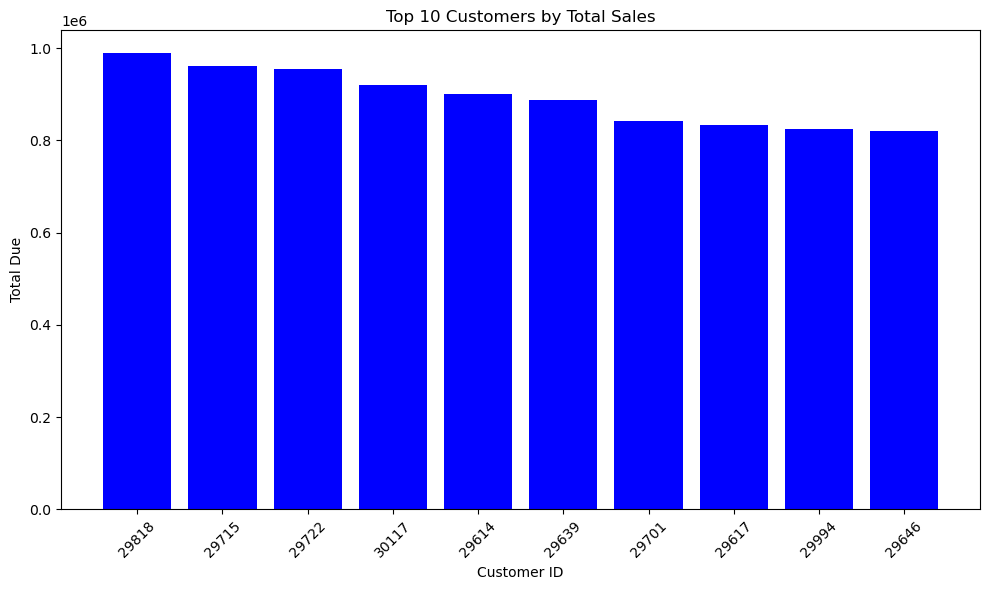

In [6]:
import matplotlib.pyplot as plt

# Seleccionar los 10 clientes con mayores ventas
top_customers = ventas_totales_por_cliente.sort_values(by='TotalDue', ascending=False).head(10)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['TotalDue'], color='blue')
plt.xlabel('Customer ID')
plt.ylabel('Total Due')
plt.title('Top 10 Customers by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Gráfico de Ventas Totales por Año
Podemos crear otro gráfico de barras para visualizar las ventas totales por año.

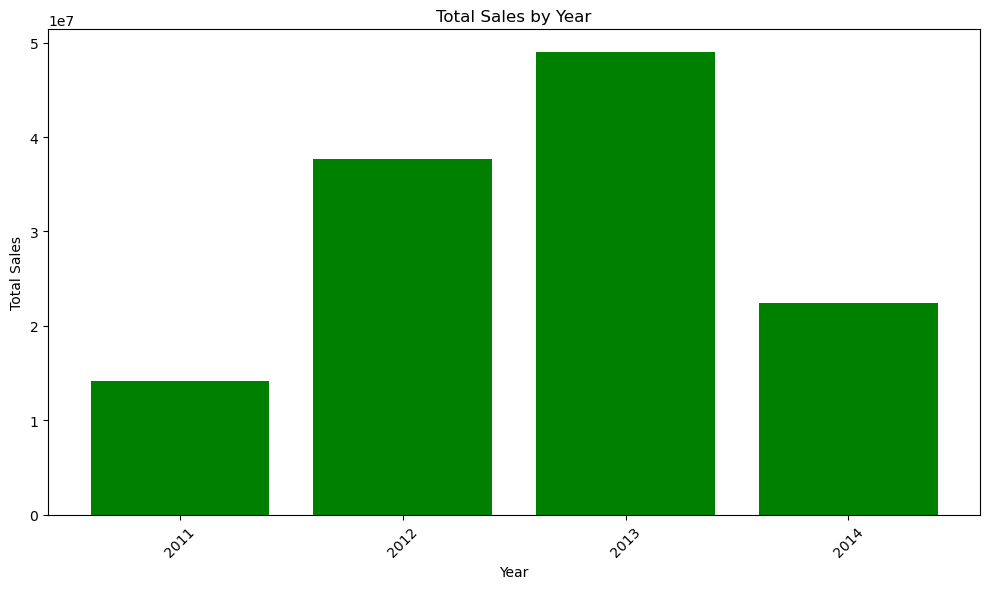

In [7]:
# Consulta para obtener ventas por año
query_ventas_por_ano = """
SELECT 
    YEAR(SOH.OrderDate) AS Year,
    SUM(SOH.TotalDue) AS TotalSales
FROM 
    Sales.SalesOrderHeader SOH
GROUP BY 
    YEAR(SOH.OrderDate)
ORDER BY 
    Year;
"""

# Ejecutar la consulta y obtener un dataframe
df_ventas_por_ano = pd.read_sql(query_ventas_por_ano, engine)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_ventas_por_ano['Year'].astype(str), df_ventas_por_ano['TotalSales'], color='green')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Gráfico de Cantidad de Pedidos por Producto
Podemos crear un gráfico de barras para visualizar la cantidad de pedidos por producto.

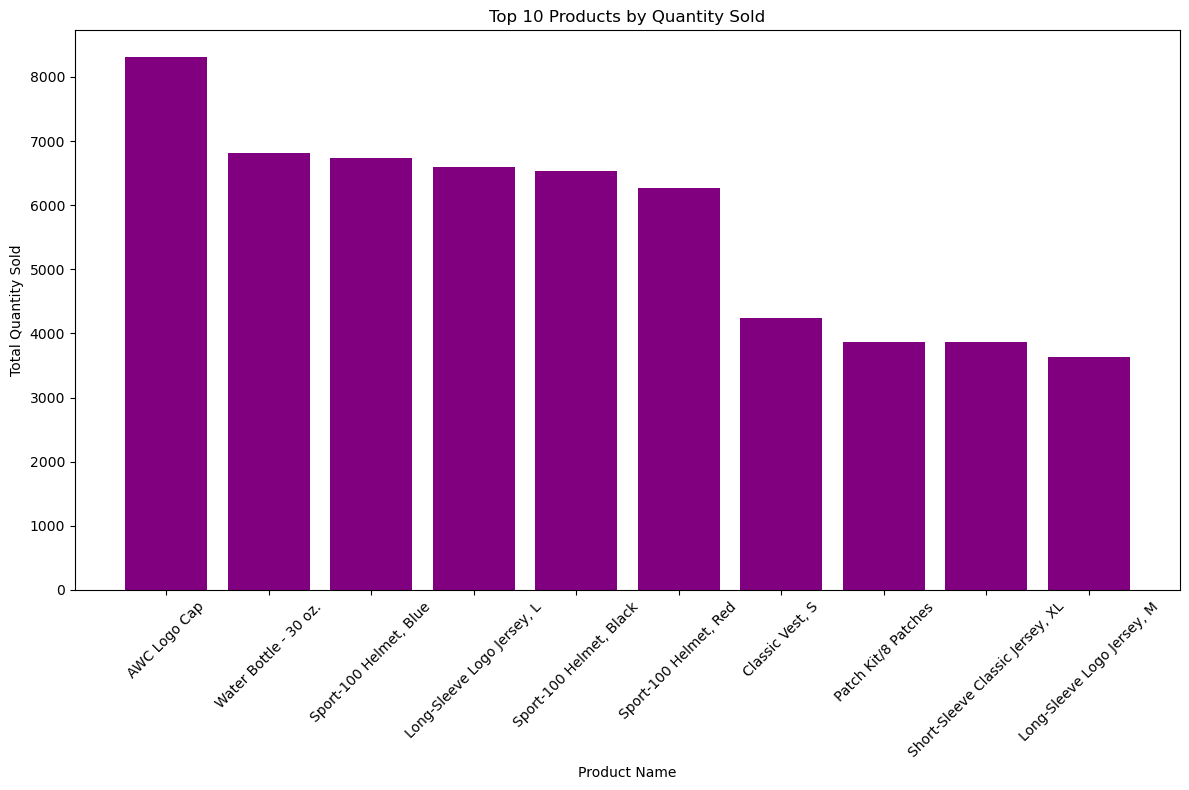

In [8]:
# Consulta para obtener productos más vendidos
query_productos_mas_vendidos = """
SELECT 
    P.ProductID,
    P.Name AS ProductName,
    SUM(SOD.OrderQty) AS TotalQuantitySold,
    SUM(SOD.LineTotal) AS TotalSalesAmount
FROM 
    Sales.SalesOrderDetail SOD
JOIN 
    Production.Product P ON SOD.ProductID = P.ProductID
GROUP BY 
    P.ProductID, P.Name
ORDER BY 
    TotalQuantitySold DESC;
"""

# Ejecutar la consulta y obtener un dataframe
df_productos_mas_vendidos = pd.read_sql(query_productos_mas_vendidos, engine)

# Seleccionar los 10 productos más vendidos
top_products = df_productos_mas_vendidos.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_products['ProductName'], top_products['TotalQuantitySold'], color='purple')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Vamos a analizar los gráficos generados y extraer algunas conclusiones relevantes sobre las ventas en la base de datos AdventureWorks2019.

1. Top 10 Clientes por Ventas Totales

Conclusión: Los 10 clientes principales generan aproximadamente las mismas cantidades de ventas totales, lo que sugiere una distribución bastante equitativa de ingresos entre ellos. Esto indica una buena diversificación en la base de clientes y una dependencia no excesiva de un único cliente para las ventas.

2. Ventas Totales por Año

Conclusión: Hay una tendencia creciente en las ventas desde 2011 hasta 2013, con un pico en 2013. Sin embargo, en 2014 se observa una disminución significativa en las ventas. Esto podría ser motivo de preocupación y podría requerir un análisis más detallado para entender las razones detrás de esta disminución. Podría deberse a factores externos del mercado, cambios en la estrategia de ventas o pérdida de clientes importantes.

3. Top 10 Productos por Cantidad Vendida

Conclusión: El producto más vendido es el "AWC Logo Cap", seguido de "Water Bottle - 30 oz." y "Sport-100 Helmet, Blue". Estos productos tienen una demanda significativamente alta. Esto sugiere que los productos relacionados con la marca y accesorios deportivos son muy populares entre los clientes. Esto puede ser una indicación para enfocarse más en la promoción y desarrollo de productos similares.